<a href="https://colab.research.google.com/github/Kundan71/Deep-Learning-Projects/blob/main/yale_face_recog_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import train_test_split

In [9]:
# Load the dataset
data = np.load('/content/drive/MyDrive/data/yale-face-database.npz')
X = data['arr_0']
y = data['arr_1'].astype(int) - 1  # Convert labels to 0-based indexing

In [11]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,
        7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
        9,  9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14,
       14, 14, 14])

array([[[ 26,  26,  26],
        [ 24,  24,  24],
        [ 20,  20,  20],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       [[ 23,  23,  23],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [ 24,  24,  24],
        [ 23,  23,  23],
        [ 24,  24,  24]],

       [[ 23,  23,  23],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23]],

       ...,

       [[170, 170, 170],
        [169, 169, 169],
        [168, 168, 168],
        ...,
        [ 97,  97,  97],
        [ 48,  48,  48],
        [ 13,  13,  13]],

       [[163, 163, 163],
        [168, 168, 168],
        [169, 169, 169],
        ...,
        [ 80,  80,  80],
        [ 34,  34,  34],
        [  7,   7,   7]],

       [[166, 166, 166],
        [167, 167, 167],
        [169, 169, 169],
        ...,
        [ 70,  70,  70],
        [ 28,  28,  28],
        [  6,   6,   6]]], dtype=uint8)
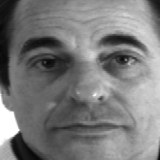

In [35]:
X[80]

In [4]:
X.shape

(105, 160, 160, 3)

In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 15
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [14]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam, SGD

def create_model(input_shape, num_classes, optimizer_name='adam', learning_rate=0.001):
    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer")

    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


### **CNN Models**

In [16]:
configs = [
    {'optimizer': 'adam', 'learning_rate': 0.001, 'epochs': 30},
    {'optimizer': 'adam', 'learning_rate': 0.0001, 'epochs': 20},
    {'optimizer': 'sgd', 'learning_rate': 0.01, 'epochs': 20},
]

#### **Model 1**

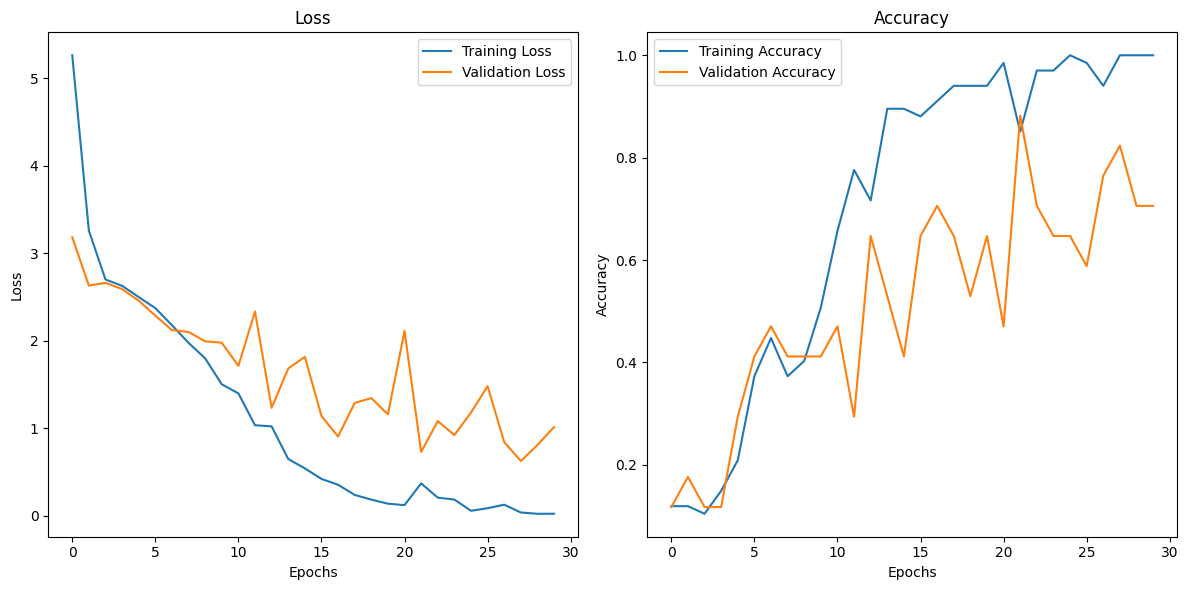

In [19]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example of plotting for the last training session
plot_learning_curves(history)


In [18]:
## Config 1 for model 1
optimizer_name = configs[0]['optimizer']
learning_rate = configs[0]['learning_rate']
epochs = configs[0]['epochs']



print(f"Training with {optimizer_name} optimizer, learning rate {learning_rate}, for {epochs} epochs...")

# Calling Model and Training with first config parameters
model = create_model(input_shape=X_train.shape[1:], num_classes=y_train.shape[1], optimizer_name=optimizer_name, learning_rate=learning_rate)
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy with {optimizer_name} optimizer, learning rate {learning_rate}: {test_acc}\n")

Training with adam optimizer, learning rate 0.001, for 30 epochs...
Epoch 1/30
3/3 [==============================] - 4s 1s/step - loss: 5.2597 - accuracy: 0.1194 - val_loss: 3.1818 - val_accuracy: 0.1176
Epoch 2/30
3/3 [==============================] - 3s 764ms/step - loss: 3.2582 - accuracy: 0.1194 - val_loss: 2.6306 - val_accuracy: 0.1765
Epoch 3/30
3/3 [==============================] - 3s 722ms/step - loss: 2.6999 - accuracy: 0.1045 - val_loss: 2.6616 - val_accuracy: 0.1176
Epoch 4/30
3/3 [==============================] - 3s 774ms/step - loss: 2.6276 - accuracy: 0.1493 - val_loss: 2.5902 - val_accuracy: 0.1176
Epoch 5/30
3/3 [==============================] - 3s 758ms/step - loss: 2.4992 - accuracy: 0.2090 - val_loss: 2.4577 - val_accuracy: 0.2941
Epoch 6/30
3/3 [==============================] - 3s 1s/step - loss: 2.3731 - accuracy: 0.3731 - val_loss: 2.2866 - val_accuracy: 0.4118
Epoch 7/30
3/3 [==============================] - 3s 802ms/step - loss: 2.1783 - accuracy: 0.4478 

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate predictions
prob_predictions = model.predict(X_test)
class_predictions = np.argmax(prob_predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate metrics
precision = precision_score(true_classes, class_predictions, average='weighted')
recall = recall_score(true_classes, class_predictions, average='weighted')
f1 = f1_score(true_classes, class_predictions, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

1/1 [==============================] - 0s 304ms/step
Precision: 0.7341269841269841
Recall: 0.8095238095238095
F1 Score: 0.7510204081632652


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


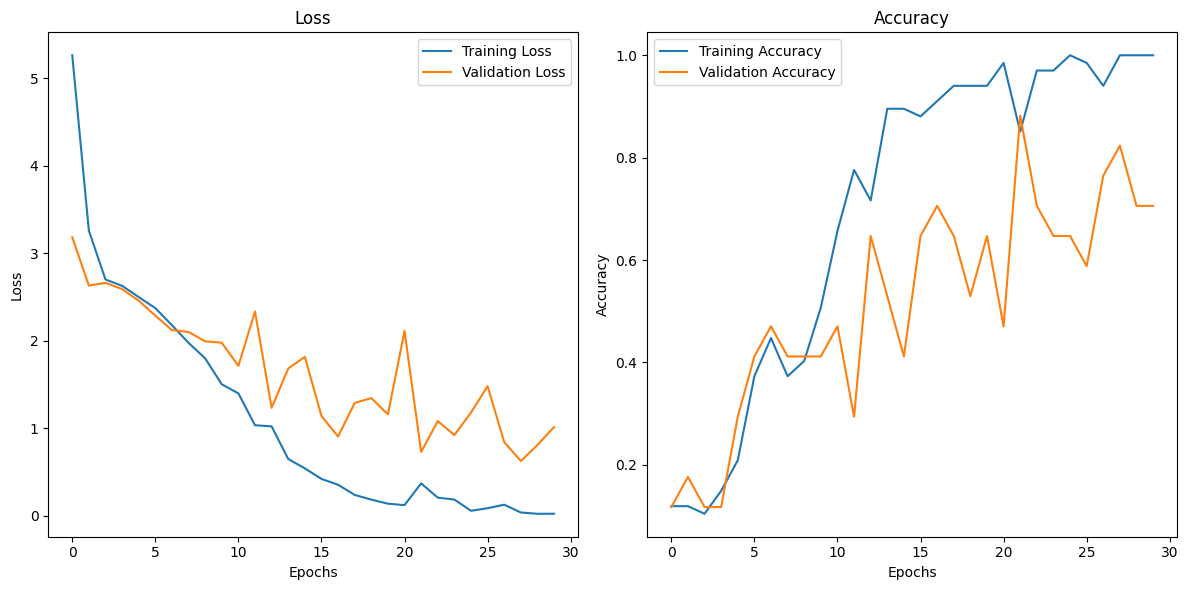

In [21]:
plot_learning_curves(history)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         2
           7       0.50      1.00      0.67         1
           9       1.00      0.50      0.67         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.67      1.00      0.80         2
          14       1.00      1.00      1.00         2

    accuracy                           0.81        21
   macro avg       0.72      0.79      0.73        21
weighted avg       0.73      0.81      0.75        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
def cnn_model_train_val(optimizer_name,learning_rate,epochs):
  print(f"Training with {optimizer_name} optimizer, learning rate {learning_rate}, for {epochs} epochs...")

  # Calling Model and Training with config parameters
  model = create_model(input_shape=X_train.shape[1:], num_classes=y_train.shape[1], optimizer_name=optimizer_name, learning_rate=learning_rate)
  history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)

  # Evaluate the model on the test set
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f"\n\nTest Accuracy with {optimizer_name} optimizer, learning rate {learning_rate}: {test_acc}\n")

  # Generate predictions
  prob_predictions = model.predict(X_test)
  class_predictions = np.argmax(prob_predictions, axis=1)
  true_classes = np.argmax(y_test, axis=1)

  # Calculate metrics
  precision = precision_score(true_classes, class_predictions, average='weighted')
  recall = recall_score(true_classes, class_predictions, average='weighted')
  f1 = f1_score(true_classes, class_predictions, average='weighted')

  print('\n\nClassification Report of Model')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1 Score: {f1}\n\n')

  plot_learning_curves(history)



#### **Model 2**

Training with adam optimizer, learning rate 0.0001, for 20 epochs...
Epoch 1/20
3/3 [==============================] - 4s 886ms/step - loss: 2.7447 - accuracy: 0.0746 - val_loss: 2.7790 - val_accuracy: 0.0000e+00
Epoch 2/20
3/3 [==============================] - 3s 855ms/step - loss: 2.6414 - accuracy: 0.0746 - val_loss: 2.7794 - val_accuracy: 0.0000e+00
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 2.6005 - accuracy: 0.0746 - val_loss: 2.7240 - val_accuracy: 0.0000e+00
Epoch 4/20
3/3 [==============================] - 2s 669ms/step - loss: 2.5564 - accuracy: 0.1940 - val_loss: 2.6550 - val_accuracy: 0.1765
Epoch 5/20
3/3 [==============================] - 3s 757ms/step - loss: 2.5228 - accuracy: 0.3731 - val_loss: 2.6164 - val_accuracy: 0.1765
Epoch 6/20
3/3 [==============================] - 2s 689ms/step - loss: 2.4868 - accuracy: 0.3284 - val_loss: 2.5895 - val_accuracy: 0.1176
Epoch 7/20
3/3 [==============================] - 3s 773ms/step - loss: 2.4487 - a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


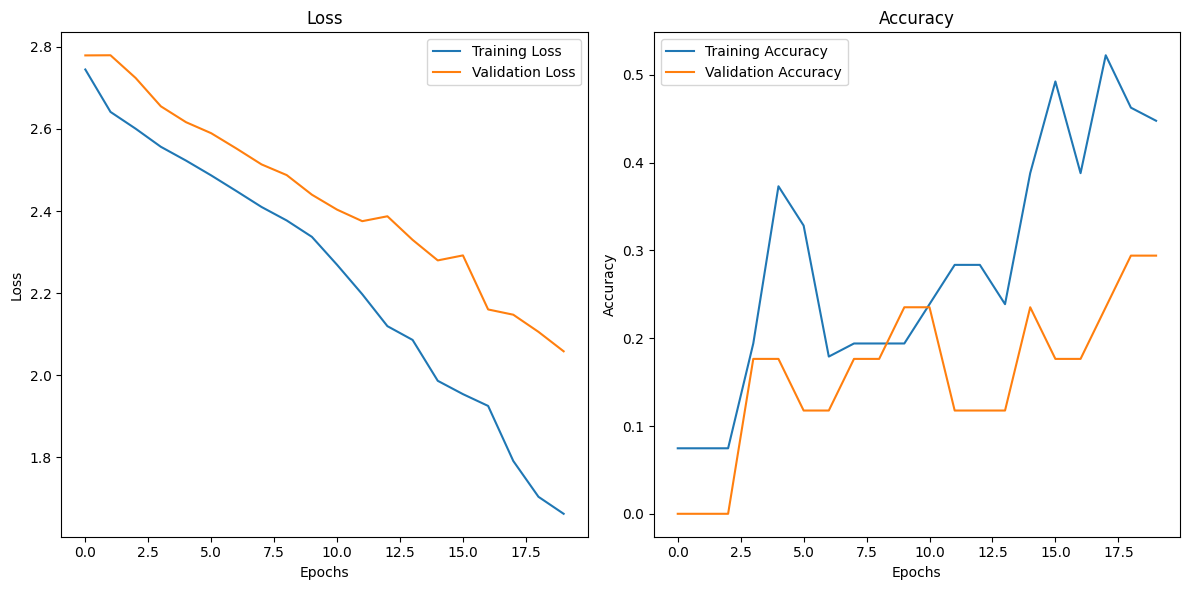

In [23]:
## Config 2 for model 2
optimizer_name = configs[1]['optimizer']
learning_rate = configs[1]['learning_rate']
epochs = configs[1]['epochs']

cnn_model_train_val(optimizer_name,learning_rate,epochs)

#### **Model 3**

Training with sgd optimizer, learning rate 0.01, for 20 epochs...
Epoch 1/20
3/3 [==============================] - 5s 1s/step - loss: 2.7090 - accuracy: 0.1045 - val_loss: 2.7038 - val_accuracy: 0.1176
Epoch 2/20
3/3 [==============================] - 2s 648ms/step - loss: 2.6857 - accuracy: 0.0299 - val_loss: 2.7064 - val_accuracy: 0.1176
Epoch 3/20
3/3 [==============================] - 2s 653ms/step - loss: 2.6885 - accuracy: 0.0597 - val_loss: 2.7225 - val_accuracy: 0.1176
Epoch 4/20
3/3 [==============================] - 2s 667ms/step - loss: 2.6773 - accuracy: 0.1045 - val_loss: 2.7374 - val_accuracy: 0.0588
Epoch 5/20
3/3 [==============================] - 2s 720ms/step - loss: 2.6697 - accuracy: 0.0896 - val_loss: 2.7493 - val_accuracy: 0.0588
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 2.6622 - accuracy: 0.0896 - val_loss: 2.7443 - val_accuracy: 0.0588
Epoch 7/20
3/3 [==============================] - 2s 641ms/step - loss: 2.6485 - accuracy: 0.0896 - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


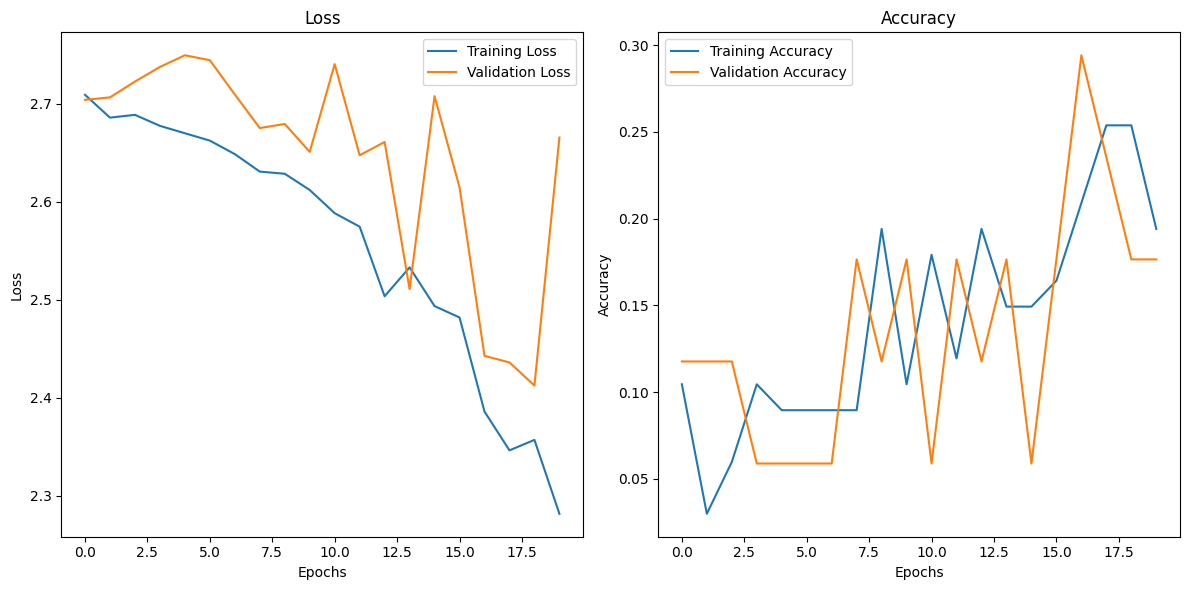

In [25]:
## Config 1 for model 1
optimizer_name = configs[2]['optimizer']
learning_rate = configs[2]['learning_rate']
epochs = configs[2]['epochs']

cnn_model_train_val(optimizer_name,learning_rate,epochs)

#### **Conclusion**

In [ ]:
#  {'optimizer': 'adam', 'learning_rate': 0.001, 'epochs': 30}  --> Accuracy = 80.95%
#  {'optimizer': 'adam', 'learning_rate': 0.0001, 'epochs': 20} --> Accuracy = 23.80%
#  {'optimizer': 'sgd', 'learning_rate': 0.01, 'epochs': 20} --> Accuracy = 9.52%

# Hence concluded that, Model config one is best.